# Medical Cost Personal Datasets


## About Dataset
Content
Columns:

* **age**: age of primary beneficiary

* **sex**: insurance contractor gender, **female, male**

* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally **18.5 to 24.9**

* **children**: Number of children covered by health insurance / Number of dependents

* **smoker**: Smoking

* **region**: the beneficiary's residential area in the US, **northeast, southeast, southwest, northwest**.

* **charges**: Individual medical costs billed by health insurance

## Problem 
**Can you accurately predict insurance costs?**

### 1 - Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

### 2 - Loading in Data

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 3 -  Data exploration

In [3]:
print(df.info())
print("-" * 60)
print("Null counts :\n",df.isnull().sum())
print("-" * 60)
print(df.describe())
print("-" * 60)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
------------------------------------------------------------
Null counts :
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
------------------------------------------------------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  1211

##### Inconsistent checking

In [4]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


#### find and drop duplicated rows

In [5]:
df[df.duplicated(keep='last')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df = df.drop(labels=195, axis=0)
df.duplicated().sum()

0

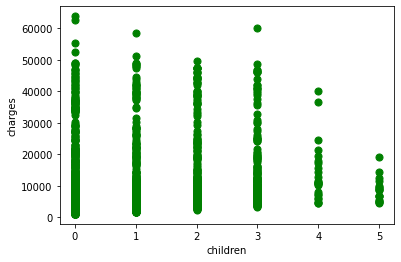

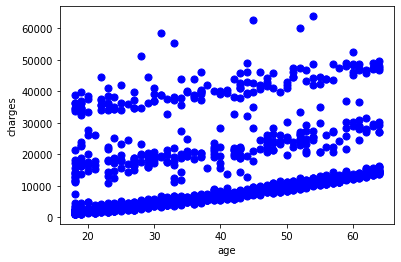

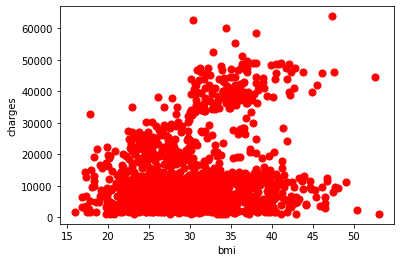

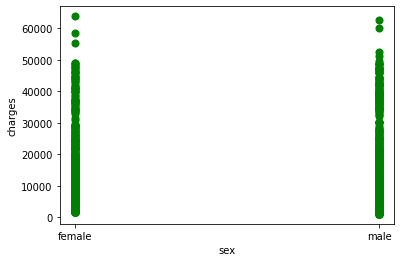

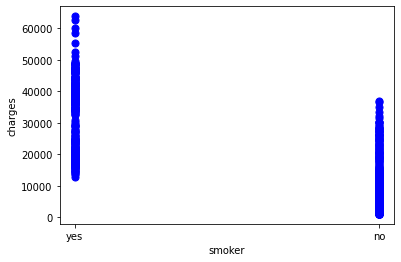

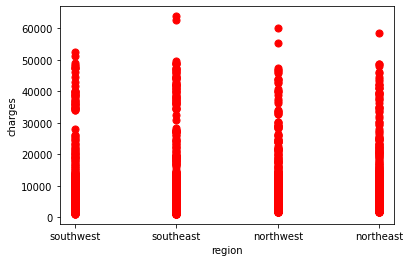

In [7]:
plt.scatter(df['children'], df['charges'], s=50, c='g')
plt.xlabel('children')
plt.ylabel('charges')
plt.show()
plt.scatter(df['age'], df['charges'], s=50, c='b')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()
plt.scatter(df['bmi'], df['charges'], s=50, c='r')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
plt.scatter(df['sex'], df['charges'], s=50, c='g')
plt.xlabel('sex')
plt.ylabel('charges')
plt.show()
plt.scatter(df['smoker'], df['charges'], s=50, c='b')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()
plt.scatter(df['region'], df['charges'], s=50, c='r')
plt.xlabel('region')
plt.ylabel('charges')
plt.show()

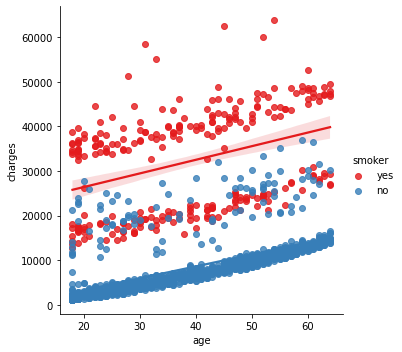

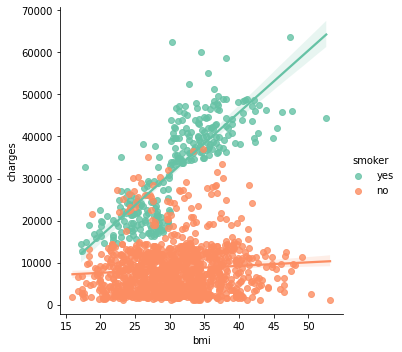

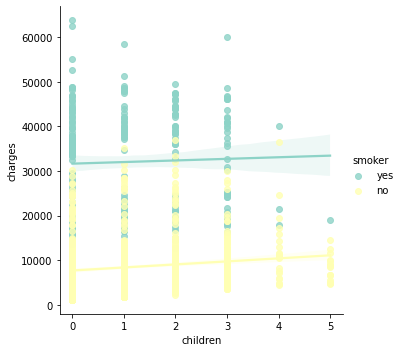

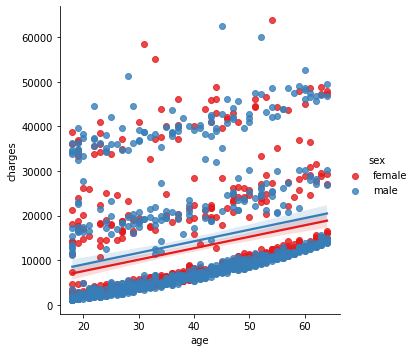

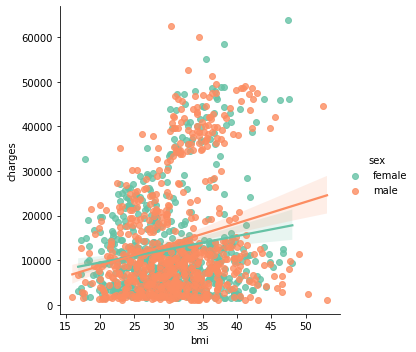

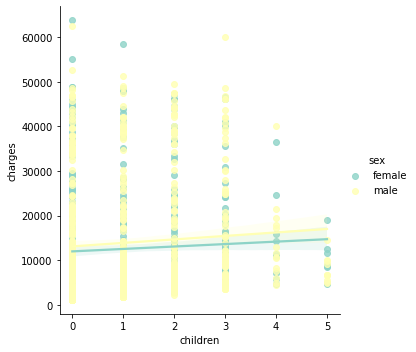

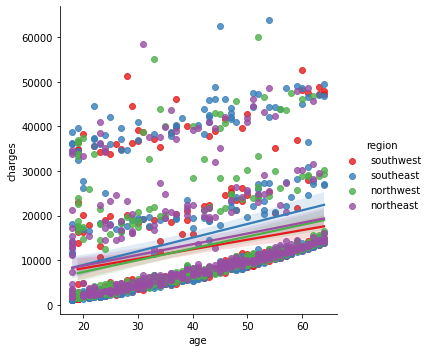

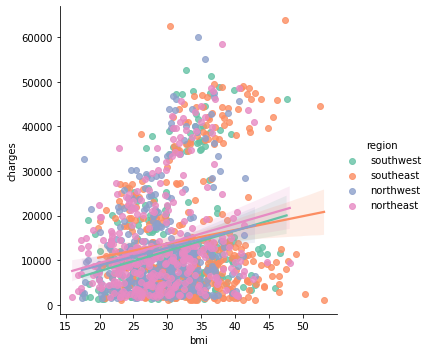

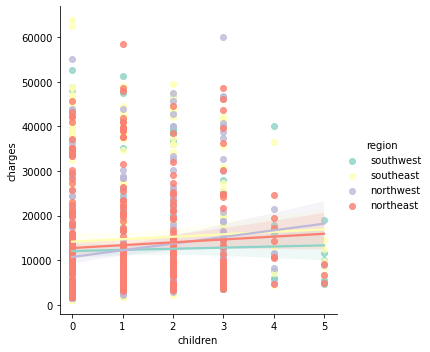

In [8]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='sex', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='sex', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='sex', palette='Set3')
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='region', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='region', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='region', palette='Set3')

##### check outlires for bmi feild 

<AxesSubplot:>

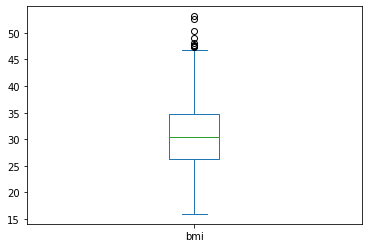

In [9]:
df['bmi'].plot(kind='box')

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


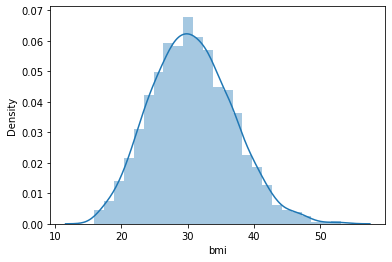

In [10]:
ax = sns.distplot(df['bmi'])
plt.show()

In [11]:
# IQR
Q1 = np.percentile(df['bmi'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['bmi'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

# Upper bound
upper=Q3+1.5*IQR

# Lower bound
lower=Q1-1.5*IQR

# Removing the outliers
df.drop(list(df[df['bmi'] >= int(upper)].index), axis=0, inplace=True)
df.drop(list(df[df['bmi'] <= int(lower)].index), axis=0, inplace=True)
print("New Shape: ", df.shape)

Old Shape:  (1337, 7)
New Shape:  (1328, 7)


/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


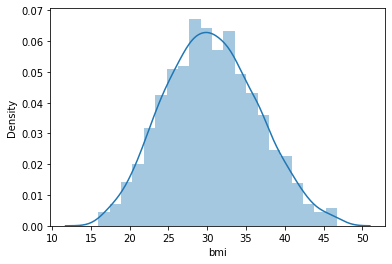

In [12]:
ax = sns.distplot(df['bmi'])
plt.show()

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


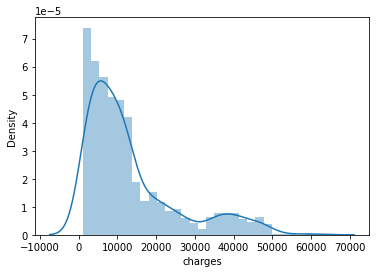

In [13]:
ax = sns.distplot(df['charges'])
plt.show()

##### check outlires for charges feild 

<AxesSubplot:>

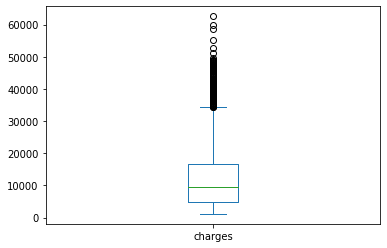

In [14]:
df['charges'].plot(kind='box')

##### Removing the outliers for charges feild

In [15]:
# IQR
Q1 = np.percentile(df['charges'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['charges'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

# Upper bound
upper=Q3+1.5*IQR

# Lower bound
lower=Q1-1.5*IQR

# Removing the outliers
df.drop(list(df[df['charges'] >= int(upper)].index), axis=0, inplace=True)
df.drop(list(df[df['charges'] <= int(lower)].index), axis=0, inplace=True)
print("New Shape: ", df.shape)

Old Shape:  (1328, 7)
New Shape:  (1191, 7)


/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


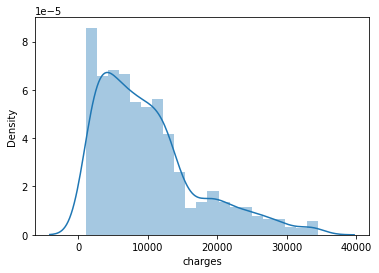

In [16]:
ax = sns.distplot(df['charges'])
plt.show()

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


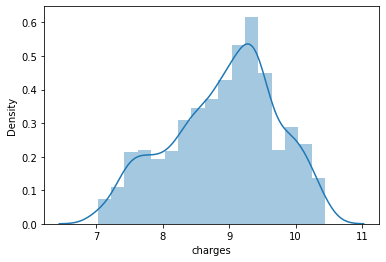

In [17]:

## Log transform
df['charges'] = np.log(df['charges'])


# df['charges'] = np.round(np.exp(df['charges']), 3)



ax = sns.distplot(df['charges'])
plt.show()

In [18]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
5,31,female,25.740,0,no,southeast,8.231275
6,46,female,33.440,1,no,southeast,9.016827
7,37,female,27.740,3,no,northwest,8.893093
8,37,male,29.830,2,no,northeast,8.765054
9,60,female,25.840,0,no,northwest,10.272397


* encode smoker

In [19]:
label_encoder_smoker = LabelEncoder()
integer_encoded_smoker = label_encoder_smoker.fit_transform(list(df['smoker']))
integer_encoded_smoker = integer_encoded_smoker.reshape(len(integer_encoded_smoker), 1)

print(integer_encoded_smoker.shape)

### One hot encoding
onehot_encoder_smoker = OneHotEncoder(sparse=False)
onehot_encoded_smoker = onehot_encoder_smoker.fit_transform(integer_encoded_smoker)
print(onehot_encoded_smoker.shape)
### delelte last column 
onehot_encoded_smoker = np.delete(arr=onehot_encoded_smoker, obj=1, axis=1)
print(onehot_encoded_smoker.shape)
print(type(onehot_encoded_smoker))
print(onehot_encoded_smoker)

df['smoker'] = onehot_encoded_smoker[:,0]

(1191, 1)
(1191, 2)
(1191, 1)
<class 'numpy.ndarray'>
[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


In [20]:
label_encoder_region = LabelEncoder()
integer_encoded_region = label_encoder_region.fit_transform(list(df['region']))
integer_encoded_region = integer_encoded_region.reshape(len(integer_encoded_region), 1)

print(integer_encoded_region.shape)

### One hot encoding
onehot_encoder_region = OneHotEncoder(sparse=False)
onehot_encoded_region = onehot_encoder_region.fit_transform(integer_encoded_region)
print(onehot_encoded_region.shape)
### delelte last column 
onehot_encoded_region = np.delete(arr=onehot_encoded_region, obj=3, axis=1)
print(onehot_encoded_region.shape)
print(type(onehot_encoded_region))
print(onehot_encoded_region)


df['region_A'] = onehot_encoded_region[:,0]
df['region_B'] = onehot_encoded_region[:,1]
df['region_C'] = onehot_encoded_region[:,2]

(1191, 1)
(1191, 4)
(1191, 3)
<class 'numpy.ndarray'>
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 0.]]


In [21]:
label_encoder_sex = LabelEncoder()
integer_encoded_sex = label_encoder_sex.fit_transform(list(df['sex']))
integer_encoded_sex = integer_encoded_sex.reshape(len(integer_encoded_sex), 1)

print(integer_encoded_sex.shape)

### One hot encoding
onehot_encoder_sex = OneHotEncoder(sparse=False)
onehot_encoded_sex = onehot_encoder_sex.fit_transform(integer_encoded_sex)
print(onehot_encoded_sex.shape)
### delelte last column 
onehot_encoded_sex = np.delete(arr=onehot_encoded_sex, obj=1, axis=1)
print(onehot_encoded_sex.shape)
print(type(onehot_encoded_sex))
print(onehot_encoded_sex)

df['sex'] = onehot_encoded_sex[:,0]

(1191, 1)
(1191, 2)
(1191, 1)
<class 'numpy.ndarray'>
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


* remove region column from dataframe 

In [22]:
df = df.drop(columns=['region'])

* Reorder dataframe columns from a list of column names

In [23]:
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region_A', 'region_B', 'region_C','charges']]

In [24]:
df

,age,sex,bmi,children,smoker,region_A,region_B,region_C,charges
0,19,1.0,27.900,0,0.0,0.0,0.0,0.0,9.734176
1,18,0.0,33.770,1,1.0,0.0,0.0,1.0,7.453302
2,28,0.0,33.000,3,1.0,0.0,0.0,1.0,8.400538
3,33,0.0,22.705,0,1.0,0.0,1.0,0.0,9.998092
4,32,0.0,28.880,0,1.0,0.0,1.0,0.0,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50,0.0,30.970,3,1.0,0.0,1.0,0.0,9.268661
1334,18,1.0,31.920,0,1.0,1.0,0.0,0.0,7.698927
1335,18,1.0,36.850,0,1.0,0.0,0.0,1.0,7.396233
1336,21,1.0,25.800,0,1.0,0.0,0.0,0.0,7.604867


<AxesSubplot:>

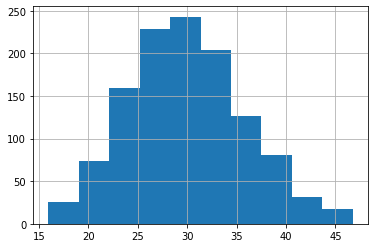

In [25]:
df['bmi'].hist()

### min max scale for children feature 

In [26]:
X_min = 0 
X_max = 5 
for X in range(0,5):
    df['children'] = df['children'].replace(X, (X-X_min)/(X_max-X_min))
df['children'] = df['children'].replace(5, (5-X_min)/(X_max-X_min))

In [27]:
corr = df.corr()  
corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,region_A,region_B,region_C,charges
age,1.000000,0.019049,0.123300,0.038179,0.065645,0.001492,0.000505,-0.018858,0.635724
sex,0.019049,1.000000,-0.015964,-0.017066,0.012020,-0.005211,-0.003685,0.004130,0.056725
bmi,0.123300,-0.015964,1.000000,0.007223,0.258530,-0.132546,-0.112797,0.231329,-0.028707
children,0.038179,-0.017066,0.007223,1.000000,0.004249,-0.023610,0.013389,-0.016461,0.186300
smoker,0.065645,0.012020,0.258530,0.004249,1.000000,-0.030886,-0.018295,-0.001580,-0.474714
region_A,0.001492,-0.005211,-0.132546,-0.023610,-0.030886,1.000000,-0.335917,-0.334433,0.078448
region_B,0.000505,-0.003685,-0.112797,0.013389,-0.018295,-0.335917,1.000000,-0.341215,0.035224
region_C,-0.018858,0.004130,0.231329,-0.016461,-0.001580,-0.334433,-0.341215,1.000000,-0.056429
charges,0.635724,0.056725,-0.028707,0.186300,-0.474714,0.078448,0.035224,-0.056429,1.000000


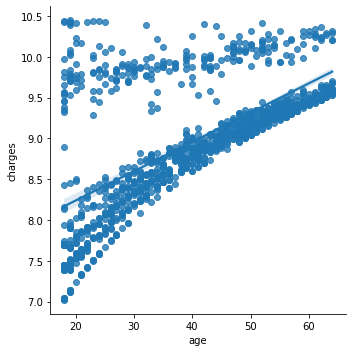

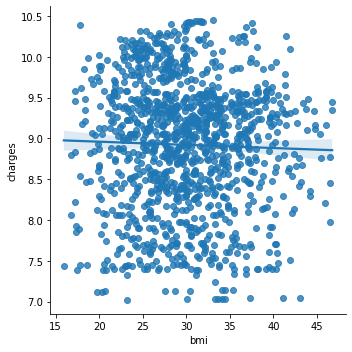

In [28]:
sns.lmplot(data=df, x="age", y="charges")
sns.lmplot(data=df, x="bmi", y="charges")

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


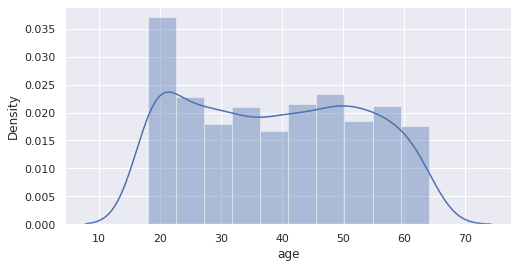

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


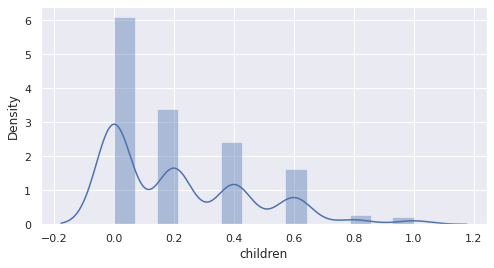

In [29]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
ax = sns.distplot(df['age'])
plt.show()
ax = sns.distplot(df['children'])
plt.show()


### train test split

In [30]:
X = df[['age','sex', 'bmi', 'children', 'smoker', 'region_A', 'region_B', 'region_C']]
y = df[['charges']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)


### PCA 

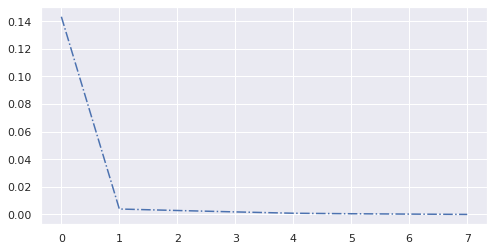

In [31]:
pca = PCA()
pca.fit(X_train)
singular_values, total = pca.explained_variance_, sum(pca.explained_variance_)
re_error = []
err = 0
for item in singular_values:
    err += item
    re_error.append(1 - err/total)
    
plt.plot(re_error, 'b-.')

In [32]:
re_error


[0.1433142011930576,
 0.0039164053104641106,
 0.0028382394428128066,
 0.0018248543865407862,
 0.0008604973308751207,
 0.0004946224163434598,
 0.00023695146041669002,
 0.0]

In [33]:
#pc = 10
#transformation = pca.components_[:, 0:pc]
#X_train_transformed = np.dot(X_train, transformation)
#X_test_transformed = np.dot(X_test, transformation)
#print(X_train.shape, X_train_transformed.shape)

Parameters Estimation using OLS method

In [34]:
one_train = np.ones((len(X_train), 1))
X_train = np.hstack((one_train, X_train))

# W* = inverse(X_Transpose *X) * X_Transpose*y

y_train = [y_train]
X_T = [[X_train[j][i] for j in range(len(X_train))] for i in range(len(X_train[0]))]

W = np.matmul(np.linalg.inv(np.matmul(X_T,X_train)) ,np.matmul(X_T,y_train))

print(len(W[0]),len(W))
print(W)

9 1
[[[ 8.13140616e+00]
  [ 3.86487211e-02]
  [ 1.09757474e-01]
  [ 5.11386363e-03]
  [ 5.50192243e-01]
  [-1.28033144e+00]
  [ 1.47011141e-01]
  [ 9.08005194e-02]
  [ 1.47506470e-02]]]


In [35]:
y_pre = W[0][0] + np.matmul(X_test,W[0][1:9])

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R-squared:", r2_score(y_test, y_pre) ) 
print("Test MSE: {}".format(mean_squared_error(y_test, y_pre) ** 0.5))


R-squared: 0.6188741081630895
Test MSE: 0.47812673541292944
